In [1]:
import pyshtools
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


/opt/anaconda3/envs/pygmt/lib/python3.8/site-packages/pyshtools/shclasses/shmagcoeffs.py:2178: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


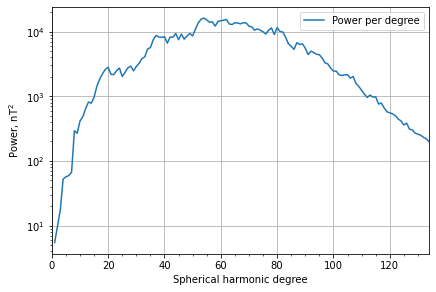

In [3]:
# Load the coefficients into an array
coeffs_array, lmax = pyshtools.shio.shread('./shc/Langlais++_Mars.cof')

# derive a SHMagCoeffs class object
coeffs = pyshtools.SHMagCoeffs.from_array(coeffs_array, r0=3389500.)

# Make the plot
coeffs.plot_spectrum()
plt.show()


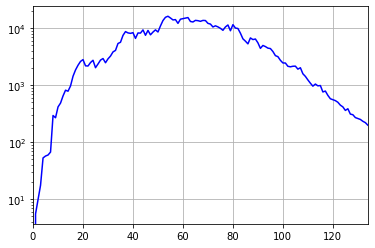

In [5]:
# Method number 2
# This does the same thing, but would allow you to add multiple spectra in the same plot

power = coeffs.spectrum(unit='per_l')

plt.semilogy(np.arange(0,lmax+1), power, color='b')
plt.xlim(0,lmax)
plt.grid()
plt.show()

In [9]:
# load the output spatial grid from vh0 into an array 
data = np.loadtxt('../OceanVIM/notebooks/vh_it.out', skiprows=2)

In [10]:
z = data[:,3].reshape(720,1440)
lons = data[:,1].reshape(720,1440)
lats = data[:,0].reshape(720,1440)-90

dataArray = xr.DataArray(z, coords=[('lat',lats[:,0]), ('lon',lons[0,:])])

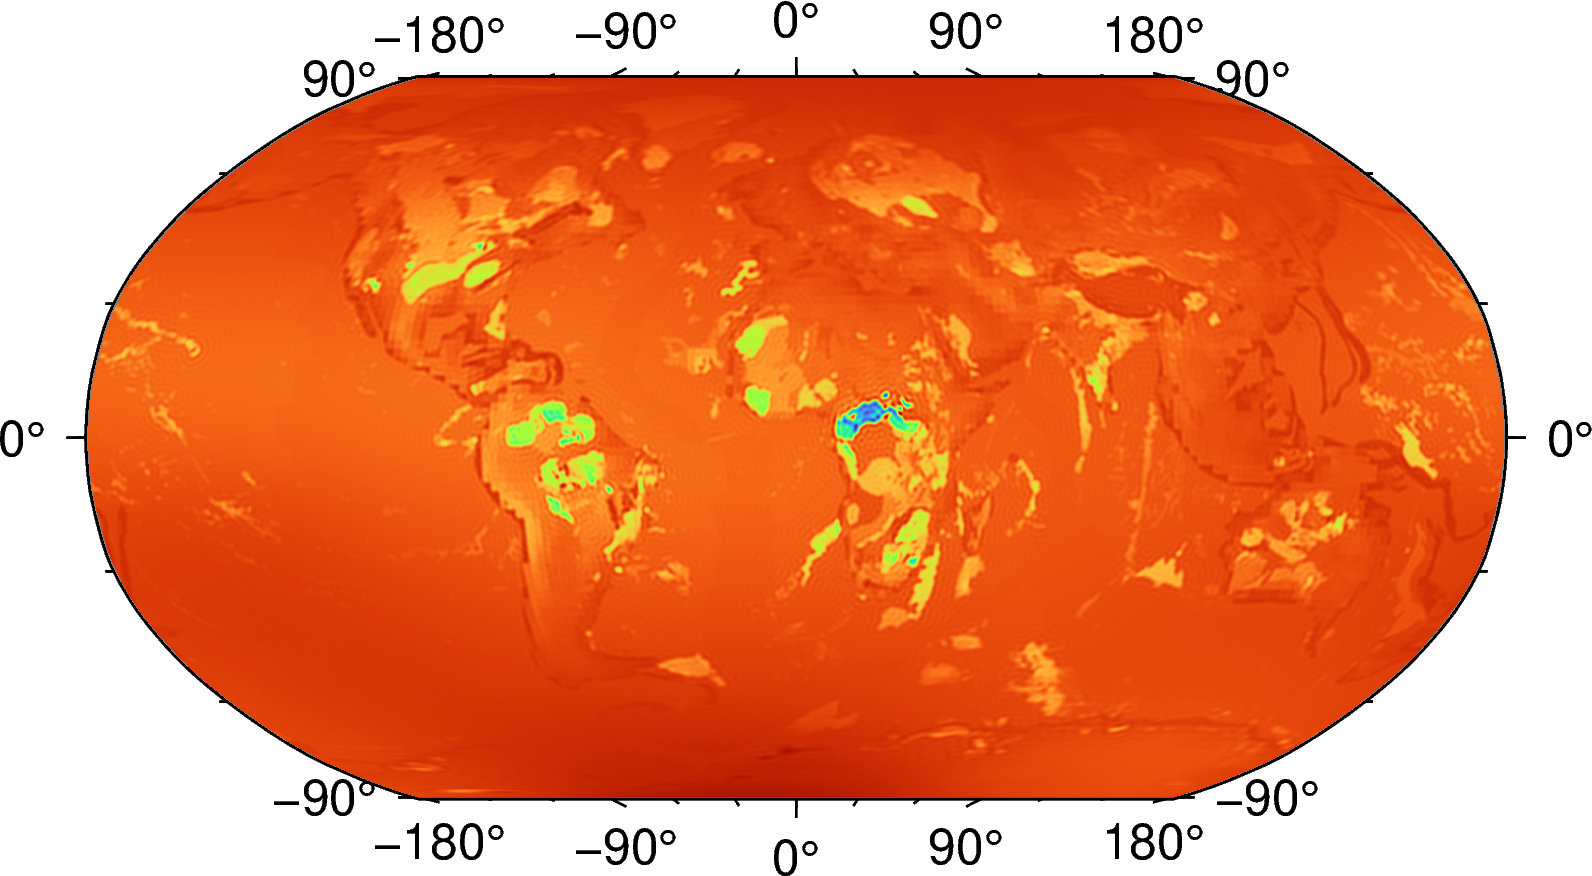

In [11]:
import pygmt

fig = pygmt.Figure()
fig.basemap(region='d', projection='N0/12c', frame='afg')
fig.grdimage(dataArray)
fig.show()
